# ニューラルネットワークのクラス分類をしてみよう

## TensorFlowとkerasをインポートしよう（Colaboratoryでは不要）

In [0]:
# # TensorFlow と tf.keras のインポート
# import tensorflow as tf
# from tensorflow import keras

In [0]:
# print(tf.version.VERSION)
# print(tf.keras.__version__)

## 学習に使用するデータを整理しよう

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")
data.head()

,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
0,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
1,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
2,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
3,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
4,debora,Woman,46,1.62,75,28.6,-2,95,-62,-14,19,-16,-13,104,-89,-153,-104,-142,sitting


## 利用するセルのみ指定して読み込み


In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset.csv", header=None,usecols=[6,7,8,9,10,11,12,13,14,15,16,17,18], encoding='UTF-8')

df.head()

,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


## ラベルの文字列を数字に置き換え

In [0]:
# 目的変数の数値変換
df[18] = df[18].map({"sitting": 0, "standing": 1, "standup": 2, "sitdown": 3, "walking": 4})
df

,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,0
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,0
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,0
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,0
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165625,-6,96,-142,-2,91,-103,14,121,-102,-194,-78,-156,4
165626,-13,94,-150,-13,88,-98,16,120,-99,-194,-79,-157,4
165627,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,4
165628,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,4


## 学習データとラベルデータに分割

In [0]:
train = df.iloc[:, :12]
label = df.iloc[: , 12]

label

0         0
1         0
2         0
3         0
4         0
         ..
165625    4
165626    4
165627    4
165628    4
165629    4
Name: 18, Length: 165630, dtype: int64

## Numpy形式に変更

In [0]:
# Numpy形式に変更
train = train.values
label = label.values

In [0]:
type(train),type(label)

(numpy.ndarray, numpy.ndarray)

## 学習データとテストデータに分割

In [0]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label = train_test_split(train ,label ,train_size = 0.7, random_state=0)
# random_state 乱数の種類を指定しておくことで、改良したときに正しく評価するため

In [0]:
train_label

array([0, 2, 4, ..., 4, 2, 0])

In [0]:
len(train_data),len(test_data),len(train_label),len(test_label)

(115940, 49690, 115940, 49690)

## ニューラルネットワークを定義

In [0]:
from tensorflow.keras import models,layers

# モデルのインスタンス化
model = models.Sequential()

model.add(layers.Dense(10,activation='relu',input_shape=(12,)))
model.add(layers.Dense(5,activation='softmax'))

## 最適化アルゴリズム、損失関数、評価関数を定義

In [0]:
# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 学習を実行

In [0]:
# 学習の実行
history = model.fit(train_data, train_label, batch_size=5000, epochs=50, verbose=2,
                   validation_data=(test_data, test_label))

Epoch 1/50
24/24 - 0s - loss: 137.2926 - accuracy: 0.3034 - val_loss: 108.5070 - val_accuracy: 0.3139
Epoch 2/50
24/24 - 0s - loss: 84.4839 - accuracy: 0.3058 - val_loss: 60.7944 - val_accuracy: 0.3606
Epoch 3/50
24/24 - 0s - loss: 42.9586 - accuracy: 0.4066 - val_loss: 28.6874 - val_accuracy: 0.3918
Epoch 4/50
24/24 - 0s - loss: 20.8277 - accuracy: 0.3806 - val_loss: 13.8777 - val_accuracy: 0.3825
Epoch 5/50
24/24 - 0s - loss: 12.0032 - accuracy: 0.4667 - val_loss: 10.9645 - val_accuracy: 0.5394
Epoch 6/50
24/24 - 0s - loss: 10.3129 - accuracy: 0.5373 - val_loss: 9.6770 - val_accuracy: 0.5277
Epoch 7/50
24/24 - 0s - loss: 9.2440 - accuracy: 0.5251 - val_loss: 8.9532 - val_accuracy: 0.5359
Epoch 8/50
24/24 - 0s - loss: 8.7290 - accuracy: 0.5427 - val_loss: 8.4639 - val_accuracy: 0.5488
Epoch 9/50
24/24 - 0s - loss: 8.2394 - accuracy: 0.5504 - val_loss: 8.0023 - val_accuracy: 0.5560
Epoch 10/50
24/24 - 0s - loss: 7.7968 - accuracy: 0.5614 - val_loss: 7.5665 - val_accuracy: 0.5663
Epoch 

## 結果を表形式に保存

In [0]:
result = pd.DataFrame(history.history)
result

,loss,accuracy,val_loss,val_accuracy
0,137.292618,0.303407,108.507019,0.313946
1,84.483894,0.305779,60.794392,0.360616
2,42.958622,0.406624,28.687428,0.391769
3,20.827715,0.380550,13.877663,0.382451
4,12.003230,0.466741,10.964534,0.539445
5,10.312911,0.537295,9.676958,0.527732
6,9.244040,0.525134,8.953199,0.535903
7,8.728980,0.542703,8.463930,0.548782
8,8.239368,0.550414,8.002264,0.555967
9,7.796833,0.561368,7.566501,0.566271


## グラフ描画

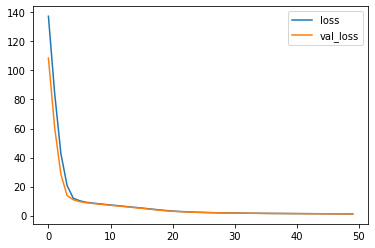

In [0]:
result[['loss','val_loss']].plot()